!jt -t oceans16

In [1]:
import sys
sys.path.append("../")
from utils.eth_blocks_utils import get_block_for_timestamp

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [12]:
from utils.network_utils import connect_eth_alchemy
connect_eth_alchemy()

from utils.contract_utils import init_contract

---
Reflexer RAI-3CRV gauge risk assessment
---

## RAI as an asset

#### Summary on the asset

1. The framework of RAI is based on Maker. The framework is called Generalised Ethereum Bond (GEB).
2. RAI is not pegged to any asset.
3. RAI is 100% backed by ETH.
4. The main framework here is that an asset is minted (RAI) off of another asset as collateral (ETH: chainlink oracle), and mimics the price action of the collateral but in a damped way. **RAI is a synthetic asset whose price mimics the price of its collateral (ETH)**.

In [3]:
ethusd_chainlink_oracle = "0xb825e25856bD98b3f2FAF2aEb6Cb8742B38C4025"
raiusd_chainlink_oracle = "0x4ad7B025127e89263242aB68F0f9c4E5C033B489"

Historic RAIUSD and ETHUSD prices:

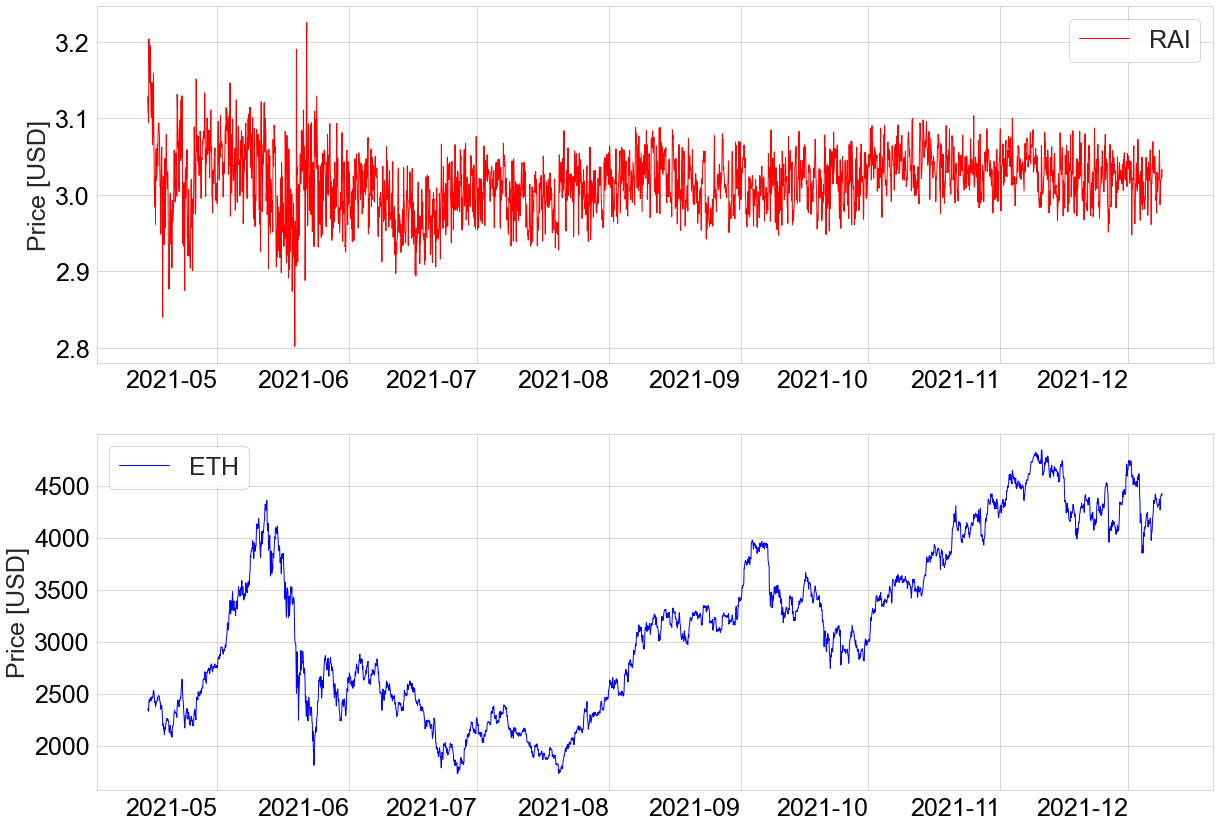

In [4]:
df_oracle_prices = pd.read_csv('./data/raiusd_ethusd_chainlink_oracle_prices.csv', index_col=[0])
df_oracle_prices.block_time = pd.to_datetime(df_oracle_prices.block_time)
df_oracle_prices.set_index('block_time', inplace=True)
fig, axes = plt.subplots(2,1, figsize=(20, 16))

df_oracle_prices['raiusd_price'].plot(
    ax=axes[0],
    color='red',
    label='RAI',
    lw=1,
    rot=0
)

df_oracle_prices['ethusd_oracle_price'].plot(
    ax=axes[1],
    color='blue',
    label='ETH',
    lw=1,
    rot=0
)

for ax in axes:
    ax.set_ylabel("Price [USD]", fontsize=25)
    ax.set_xlabel("")
    ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.legend(fontsize=25)

In [5]:
df_oracle_prices

,block_number,ethusd_oracle_price,raieth_oracle_price,raiusd_price
block_time,,,,
2021-04-14 16:04:36,12238662,2355.670000,0.001328,3.128330
2021-04-14 17:57:23,12239162,2347.598579,0.001328,3.117611
2021-04-14 19:53:19,12239662,2340.334014,0.001328,3.107964
2021-04-14 21:47:33,12240162,2329.780000,0.001328,3.093948
2021-04-14 23:41:01,12240662,2412.560000,0.001328,3.203880
...,...,...,...,...
2021-12-08 16:51:17,13765662,4402.224364,0.000686,3.019311
2021-12-08 18:43:41,13766162,4402.994499,0.000686,3.019839
2021-12-08 20:36:24,13766662,4408.266910,0.000686,3.023455


The data was derived from the oracles mentioned earlier. Considering RAI is a collateral that 'mimics' its collateral in a damped format, it has held a very stable price over different market regimes. Zooming into the May 2021 crash:

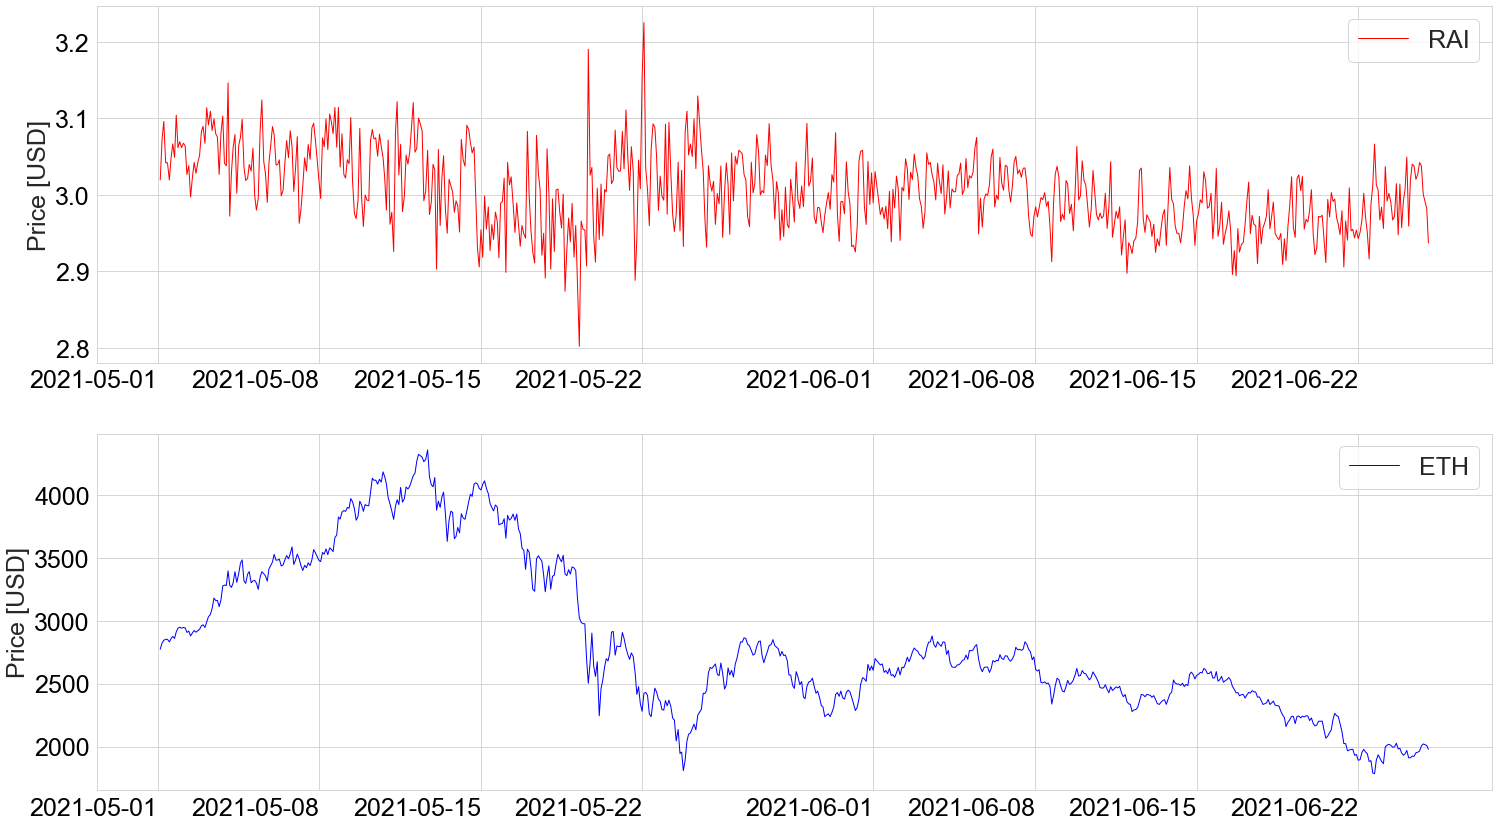

In [6]:
crash_start_block = get_block_for_timestamp(timestamp=int(pd.Timestamp('2021-05-01').timestamp()))
crash_end_block = get_block_for_timestamp(timestamp=int(pd.Timestamp('2021-06-25').timestamp()))
df_crash = df_oracle_prices.loc[
    (crash_start_block < df_oracle_prices.block_number) &
    (df_oracle_prices.block_number < crash_end_block)
]

fig, axes = plt.subplots(2,1, figsize=(25, 16))

df_crash['raiusd_price'].plot(
    ax=axes[0],
    color='red',
    label='RAI',
    lw=1,
    rot=0
)

df_crash['ethusd_oracle_price'].plot(
    ax=axes[1],
    color='blue',
    label='ETH',
    lw=1,
    rot=0
)

for ax in axes:
    ax.set_ylabel("Price [USD]", fontsize=25)
    ax.set_xlabel("")
    ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
    ax.yaxis.get_major_formatter().set_scientific(False)
    ax.yaxis.get_major_formatter().set_useOffset(False)
    ax.legend(fontsize=25)

In [7]:
df_crash

,block_number,ethusd_oracle_price,raieth_oracle_price,raiusd_price
block_time,,,,
2021-05-01 02:47:30,12345162,2774.490024,0.001088,3.019533
2021-05-01 04:43:17,12345662,2823.739034,0.001088,3.073132
2021-05-01 06:29:52,12346162,2844.880000,0.001088,3.096140
2021-05-01 08:25:12,12346662,2852.930000,0.001066,3.042007
2021-05-01 10:18:25,12347162,2852.890000,0.001066,3.041964
...,...,...,...,...
2021-06-24 17:34:11,12697662,2005.193781,0.001515,3.037907
2021-06-24 19:30:08,12698162,2021.793017,0.001484,3.000616
2021-06-24 21:16:59,12698662,2015.901041,0.001484,2.991871


The value of RAI has remained fairly stable in extreme market regimes (volatility and price action)

---



---
Rai Redemption Price
---

There are two prices attached to RAI:
 1. Market Price (arbitraged across markets): this is determined via a Chainlink oracle with the following sources of information
    - [Uniswap v2](https://etherscan.io/address/0x8aE720a71622e824F576b4A8C03031066548A3B1)
    - [Uniswap v3](https://etherscan.io/address/0xcb0c5d9d92f4f2f80cce7aa271a1e148c226e19d)
    - [Coinbase RAIUSD](https://www.coinbase.com/price/rai)
    - _Pending Curve RAI-3CRV prices_.
 2. The redemption price is determined by the redemption rate: when positive increases the redemption price of RAI (re-values), when negative it reduces the redemption price of RAI (de-values).

One can safely say that the redemption price is the platform's 'desired price' of RAI. At any given time, there exists a delta between the redemption price and the market price. This changes over time: at any given point, the redemption rate either encourages minting more RAI or encourages settling debts. This re-pricing of the Ethereum Bond incentivises balancing market and redemption prices of RAI:

    - RAI Market Price > RAI Redemption Price, Redemption Rate is Negative (protocol devalues RAI): You can now take on more debt and sell RAI in the open market for DAI or other assets. This brings the market price down.

    - RAI Market Price < RAI Redemption Price, Redemption Rate is Positive (protocol revalues RAI): Buy RAI in the open market, pay back debt cheaper. This brings RAI market prices up.


Historic Redemption Prices:

In [ ]:
df_collateral_ratio = pd.read_csv('./data/historic_global_collateral_ratio_and_liquidation_ratio.csv', index_col=[0])
df_collateral_ratio.block_time = pd.to_datetime(df_collateral_ratio.block_time)
df_collateral_ratio.set_index('block_time', inplace=True)

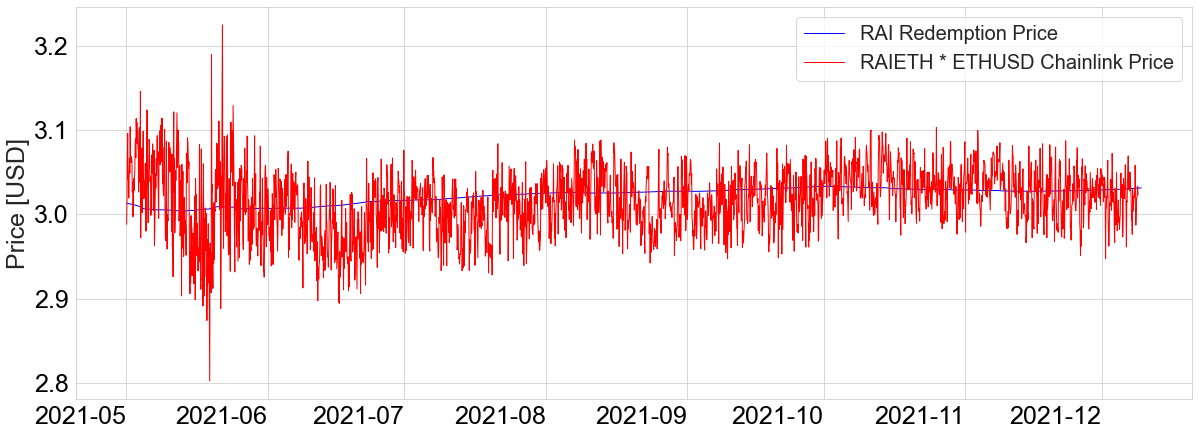

In [23]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_collateral_ratio_cropped = df_collateral_ratio[df_collateral_ratio.index > pd.Timestamp('2021-05')]
df_oracle_prices_cropped = df_oracle_prices[df_oracle_prices.index > pd.Timestamp('2021-05')]

df_collateral_ratio_cropped['redemption_price'].plot(
    ax=ax,
    color='blue',
    label='RAI Redemption Price',
    lw=1,
)

df_oracle_prices_cropped['raiusd_price'].plot(
    ax=ax,
    color='red',
    label='RAIETH * ETHUSD Chainlink Price',
    lw=1,
    rot=0
)

ax.set_ylabel("Price [USD]", fontsize=25)
ax.set_xlabel("")
ax.legend(fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False);


---
RAI Collateralisation
---

The following graph gives an idea on the collateral to debt ratio of RAI, or the solvency of the entire system.


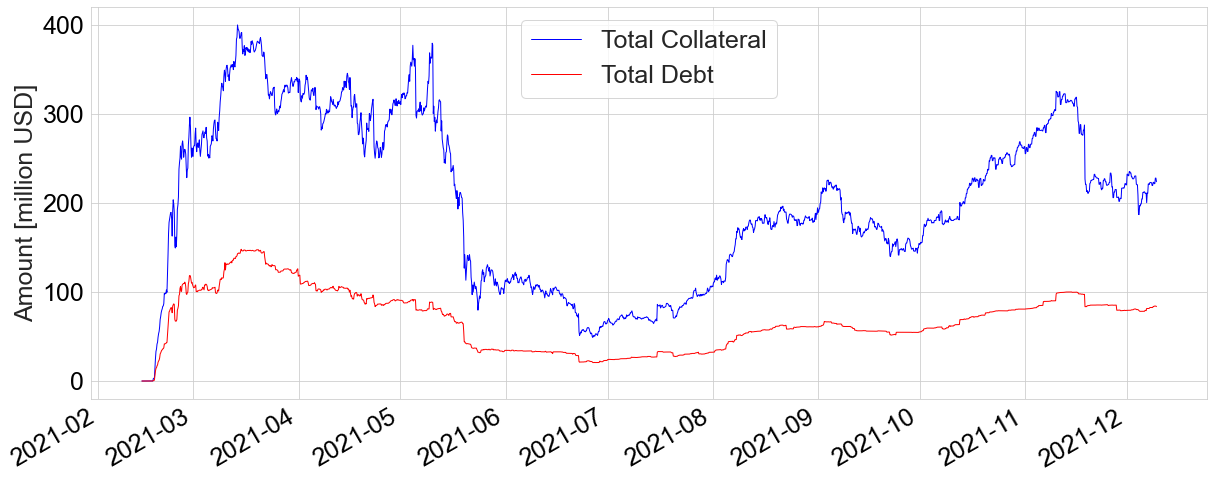

In [8]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

(df_collateral_ratio['total_collateral_usd']*1e-6).plot(
    ax=ax,
    color='blue',
    label='Total Collateral',
    lw=1,
)

(df_collateral_ratio['total_debt_usd']*1e-6).plot(
    ax=ax,
    color='red',
    label='Total Debt',
    lw=1,
)

ax.set_ylabel("Amount [million USD]", fontsize=25)
ax.set_xlabel("")
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);

In [9]:
df_collateral_ratio

,block_number,block_timestamp,number_of_safes,fsm_price,total_collateral_eth,total_debt_rai,redemption_price,total_collateral_usd,total_debt_usd,liquidation_ratio,global_collateral_ratio
block_time,,,,,,,,,,,
2021-02-13 19:49:58,11850000,1613242198,2,1803.656430,5.292360,8.000000e+02,3.140000,9.545600e+03,2.512000e+03,1.45,3.800000
2021-02-13 23:39:12,11851000,1613255952,2,1803.656430,5.292360,8.000000e+02,3.140000,9.545600e+03,2.512000e+03,1.45,3.800000
2021-02-14 03:11:12,11852000,1613268672,2,1803.656430,5.292360,8.000000e+02,3.140000,9.545600e+03,2.512000e+03,1.45,3.800000
2021-02-14 06:39:51,11853000,1613281191,2,1803.656430,5.292360,8.000000e+02,3.140000,9.545600e+03,2.512000e+03,1.45,3.800000
2021-02-14 10:28:03,11854000,1613294883,3,1803.656430,9.292360,1.988440e+03,3.140000,1.676023e+04,6.243703e+03,1.45,2.684341
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-09 01:47:38,13768000,1639010858,2234,4301.460000,51530.304179,2.775687e+07,3.031312,2.216555e+08,8.413971e+07,1.35,2.634375
2021-12-09 05:38:14,13769000,1639024694,2235,4301.460000,51540.304179,2.775885e+07,3.031312,2.216986e+08,8.414573e+07,1.35,2.634698
2021-12-09 09:22:59,13770000,1639038179,2235,4421.849344,51540.304179,2.775885e+07,3.031420,2.279035e+08,8.414875e+07,1.35,2.708341


Visualised simpler, global collateral ratio compared to liquidation ratio, where the ratio represents the system's total assets in collateral versus total debt. For ease of understanding: the blue line (system state) should be above the red line (mass liquidation events).

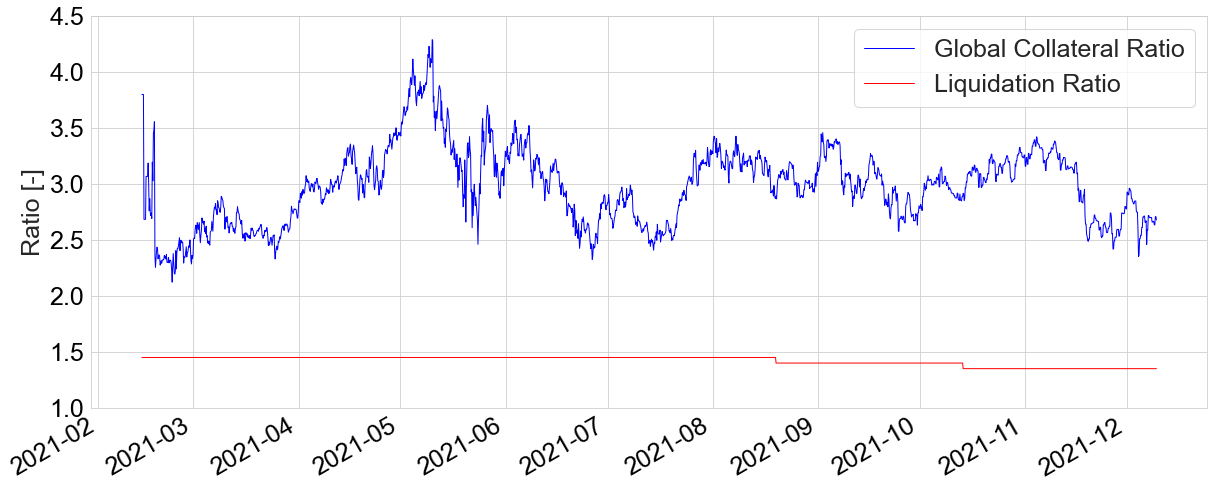

In [10]:
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_collateral_ratio['global_collateral_ratio'].plot(
    ax=ax,
    color='blue',
    label='Global Collateral Ratio',
    lw=1,
)

df_collateral_ratio['liquidation_ratio'].plot(
    ax=ax,
    color='red',
    label='Liquidation Ratio',
    lw=1,
)

ax.set_ylabel("Ratio [-]", fontsize=25)
ax.set_xlabel("")
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25)
ax.set_ylim([1, 4.5]);

Looks like RAI's system is solvent with a good buffer between collateral to liquidation ratios. RAI has proved to be a resilient asset in volatile market regimes.

---


---

Reflexer Labs and RAI governance
---
Answers:

– How long has platform been live? (Is it time tested?)
– Other benchmarks (revenue/TVL)
- Level of decentralisation
- Multisigs: what can it do?
- Who's in the multisig?
- Are there any safeguards in place?
- Audit reports.

**Platform History**
RAI implementation on-chain began in block 11848304: Feb-13-2021 12:33:18 PM +UTC (so, more than 300 days at the time of writing this report).

**Revenue/TVL**
The platform does not have any revenue. The model of revenue is similar to Maker: the stability fee generates revenue: fees are expected to be switched on at a later stage. The current TVL is 51,076.03 ETH (derived from [Reflexer Protocol Analytics](https://stats.reflexer.finance/)), or \$210 million USD. The contract capturing this TVL is [0x2D3cD7b81c93f188F3CB8aD87c8Acc73d6226e3A](https://etherscan.io/address/0x2D3cD7b81c93f188F3CB8aD87c8Acc73d6226e3A):

In [16]:
weth_contract = init_contract("0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2")
weth_contract.balanceOf("0x2D3cD7b81c93f188F3CB8aD87c8Acc73d6226e3A") * 1e-18  # weth balance of the geb eth contract

51629.53272633577

**Multisig**

There is a **3/5 multisig** involved, which has **2 people outside the team** and a **24 hours Governance Delay**. The multisig address is [0x427A277eA53e25143B3b509C684aA4D0EB8bA01b](https://etherscan.io/address/0x427A277eA53e25143B3b509C684aA4D0EB8bA01b). The goal of the platform is to [minimise governance](https://docs.reflexer.finance/ungovernance/governance-minimization-guide): the deadline for removing the multisig is mid August, 2022. The requirements for Governance minimisation are:
1. Protocol must not add or plan to add more collateral types.
2. All infrastructure must be audited and tested in prod.
3. System must accrue enough surplus in main treasury so it can afford to pay for running infrastructure.

There are lots of discussions on-going in the Reflexer Governance forums. One such discussion is the [discussion of keeping protocol and treasury governance separated, to ensure malicious governance is deterred](https://community.reflexer.finance/t/community-voting-post-rai-ungovernance/97).

Currently the multisig has the capability to upgrade and manually set almost all components in the GEB (Generalised Ethereum Bond) framework. The process of governance minimisation aims to reduce this drastically.



**Audit Reports**

All audits can be found in: <https://github.com/reflexer-labs/geb-audits>. The following list the one's known. If there are audit reports originating from Reflexer's github, those were not found in the auditor's githubs.

There are a few sets of audits done by
1. OpenZepplin: <https://blog.openzeppelin.com/geb-protocol-audit/>
2. Quantstamp:
    - <https://certificate.quantstamp.com/full/reflexer-staking-and-auction-house>
    - <https://github.com/reflexer-labs/geb-audits/blob/master/quantstamp/helper-contracts/second-audit/Reflexer%20Second%20Engagement%20-%20Final%20Report.pdf>
    - <https://certificate.quantstamp.com/full/reflexer-rai-curve-pool>
3. Solidified:
    - <https://github.com/solidified-platform/audits/blob/master/Audit%20Report%20-%20Uniswap%20V3%20Liquidity%20Manager%20%5B24.06.2021%5D.pdf>
    - <https://github.com/reflexer-labs/geb-audits/blob/master/solidified/helper-contracts/Solidified%20Audit%20Report%20-%20Reflexer%20%5B26.01.2021%5D.pdf>

Summary of Audit Reports:


---



---

Curve pool stats:
---
Answers:
- Curve pool history
– How long have they had a pool up?
– Historical TVL/Volume

The RAI-3CRV pool's genesis was in [block 13634171](https://etherscan.io/tx/0xd8ed515d92bd83652a44c421488655993201513efa50dc3601fbdcba5a3afbe2). It is a custom curve v1 metapool implementation, owing to the nature of RAI: the focus of the RAI custom implementation has been on accommodating the redemption price into the pool.

The TVL is, thus far


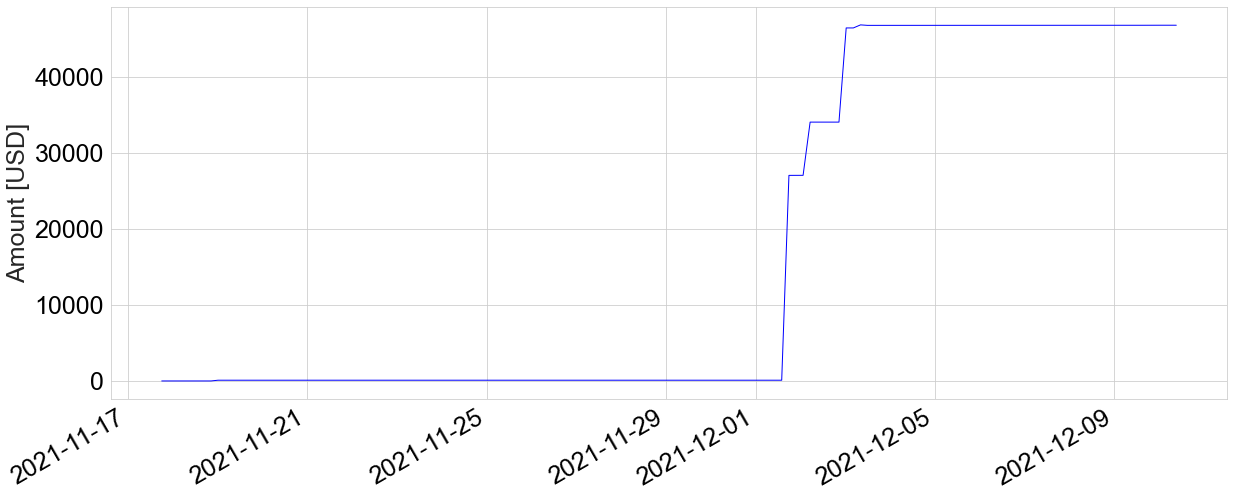

In [17]:
df_rai_3crv = pd.read_csv('./data/rai_3crv_pool_data.csv', index_col=[0])
df_rai_3crv.index = pd.to_datetime(df_rai_3crv.block_time)
fig, ax = plt.subplots(1,1, figsize=(20, 8))

df_rai_3crv['total_pool_balance'].plot(
    ax=ax,
    color='blue',
    lw=1,
)

ax.set_ylabel("Amount [USD]", fontsize=25)
ax.set_xlabel("")
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False);



#### Pool implementation:

– Is the code audited, by whom, is it comprehensive, auditor’s reputation?
– Relevant findings in the code

1. Custom metapool implementation audited by curve core **add links to graph, screenshot of how RAI oracle price is fetched**


---
Useful links
---

1. **RAI Dashboard**:[RAI Protocol Analytics (maintained by RAI themselves)](https://stats.reflexer.finance/)